In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image,ImageDraw,ImageFont
import matplotlib.pyplot as plt

# 导入预训练好的网络

In [2]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
## 定义使用COCO数据集对应的类别的名称
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

len(COCO_INSTANCE_CATEGORY_NAMES)

91

## 准备图像，并预测

In [4]:
image=Image.open("G:\\BaiduNetdiskDownload\\程序\\programs\\programs\\data\\chap10\\2012_004308.jpg")
transform=transforms.Compose([transforms.ToTensor()])
image_t=transform(image)
print(image_t.shape)
pred=model([image_t])
pred

torch.Size([3, 333, 500])


[{'boxes': tensor([[138.8979,  35.2288, 305.6443, 213.2750],
          [ 86.4832, 104.2873, 291.6669, 275.5661],
          [443.8921, 298.0195, 482.3445, 332.6437],
          [176.6946,  45.9835, 293.7781, 166.4123],
          [147.0146,  63.8678, 242.4806, 223.3750],
          [ 79.5366,  86.4452, 309.5218, 276.2127],
          [264.2996, 289.0608, 349.1430, 330.7356],
          [247.2619,  79.1067, 496.0333, 324.0506],
          [304.7961,  67.7112, 500.0000, 314.9585],
          [263.8831, 287.5616, 347.9423, 331.0927],
          [456.7865, 299.7125, 477.6920, 327.9485],
          [307.1769,  78.2653, 498.4327, 310.5164],
          [159.9498, 103.3915, 288.9909, 240.5265]], grad_fn=<StackBackward0>),
  'labels': tensor([ 1,  2,  1,  1,  1,  4, 15,  2,  5,  8,  1, 38,  2]),
  'scores': tensor([0.9954, 0.9673, 0.8880, 0.8211, 0.7102, 0.5602, 0.2864, 0.2077, 0.1898,
          0.0914, 0.0851, 0.0541, 0.0515], grad_fn=<IndexBackward0>)}]

## 可视化图像

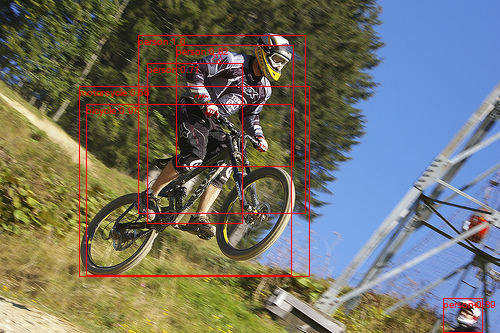

In [5]:
pred_class=[COCO_INSTANCE_CATEGORY_NAMES[ii] for ii in list(pred[0]["labels"].numpy())]  # 获取类别
pred_score=list(pred[0]['scores'].detach().numpy())  # 获取得分
# 获取目标框的坐标
pred_boxes=[[ii[0],ii[1],ii[2],ii[3]] for ii in list(pred[0]["boxes"].detach().numpy())]
# 只保留识别概率大于0.5的结果
pred_index=[pred_score.index(x) for x in pred_score if x > 0.5]
# 设置图像显示字体
fontsize=np.int16(image.size[1]/30)
font1=ImageFont.truetype("C:\\Windows\\Fonts\\arial.ttf")

# 可视化图像
draw=ImageDraw.Draw(image)
for idx in pred_index:
    box=pred_boxes[idx]
    draw.rectangle(box,outline="red")
    texts=pred_class[idx]+":"+str(np.round(pred_score[idx],2))
    draw.text((box[0],box[1]),texts,fill="red",font=font1)
    
image

## 将上述代码封装成一个函数，方便调用

In [6]:
def object_detect(model,image_path:str,coco_names,threshold=0.5):
    image=Image.open(image_path)
    transform=transforms.Compose([transforms.ToTensor()])
    image_t=transform(image)
    print(image_t.shape)
    pred=model([image_t])
    
    pred_class=[coco_names[ii] for ii in list(pred[0]["labels"].numpy())]  # 获取类别
    pred_score=list(pred[0]['scores'].detach().numpy())  # 获取得分
    # 获取目标框的坐标
    pred_boxes=[[ii[0],ii[1],ii[2],ii[3]] for ii in list(pred[0]["boxes"].detach().numpy())]
    # 只保留识别概率大于0.5的结果
    pred_index=[pred_score.index(x) for x in pred_score if x > threshold]
    # 设置图像显示字体
    fontsize=np.int16(image.size[1]/30)
    font1=ImageFont.truetype("C:\\Windows\\Fonts\\arial.ttf")

    # 可视化图像
    draw=ImageDraw.Draw(image)
    for idx in pred_index:
        box=pred_boxes[idx]
        draw.rectangle(box,outline="red")
        texts=pred_class[idx]+":"+str(np.round(pred_score[idx],2))
        draw.text((box[0],box[1]),texts,fill="red",font=font1)

    return image

torch.Size([3, 378, 682])


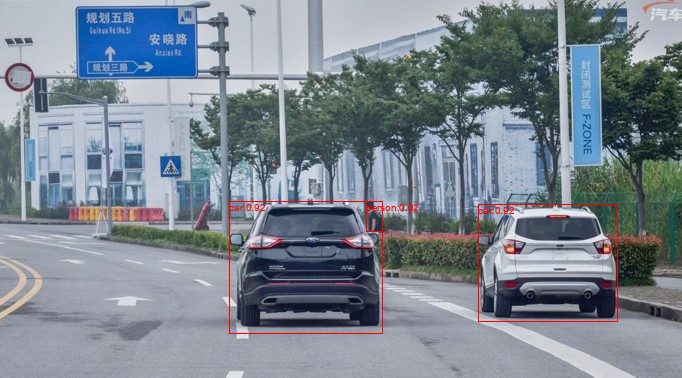

In [7]:
object_detect(model=model,
    image_path="./road1.jpg",
    coco_names=COCO_INSTANCE_CATEGORY_NAMES
    )

torch.Size([3, 428, 665])


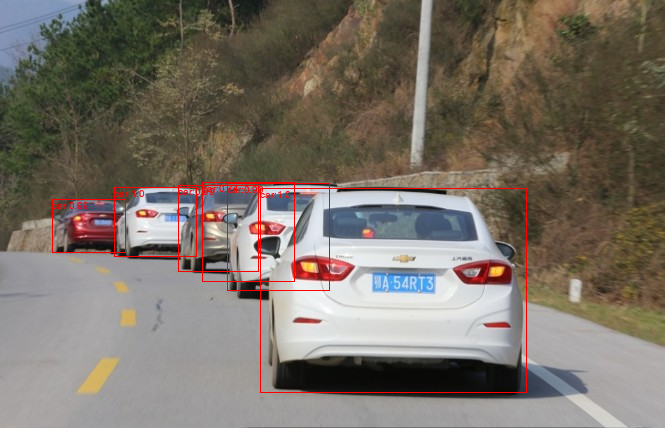

In [8]:
object_detect(model=model,
              image_path="./montain road.jpg",
              coco_names=COCO_INSTANCE_CATEGORY_NAMES
              )


torch.Size([3, 414, 556])


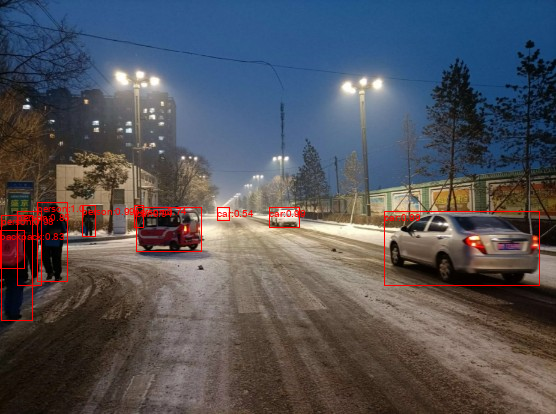

In [9]:
object_detect(model=model,
    image_path="./snow road.jpg",
    coco_names=COCO_INSTANCE_CATEGORY_NAMES
    )

torch.Size([3, 397, 665])


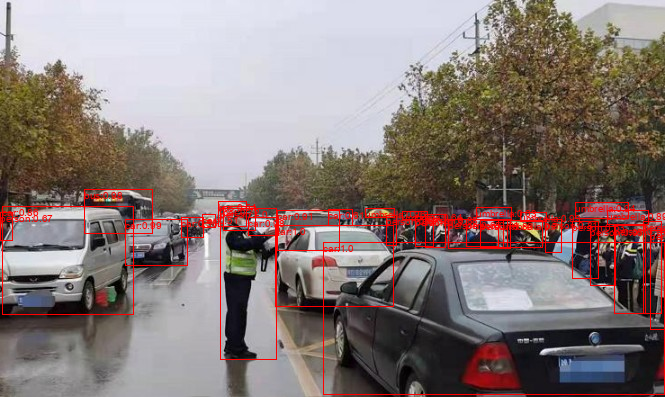

In [10]:
object_detect(model=model,
              image_path="./rain and police.jpg",
              coco_names=COCO_INSTANCE_CATEGORY_NAMES
              )


torch.Size([3, 557, 426])


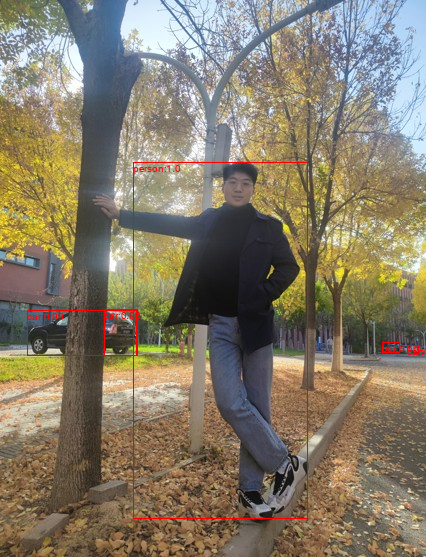

In [11]:
object_detect(model=model,
              image_path="./qrfst2.jpg",
              coco_names=COCO_INSTANCE_CATEGORY_NAMES
              )


torch.Size([3, 440, 749])


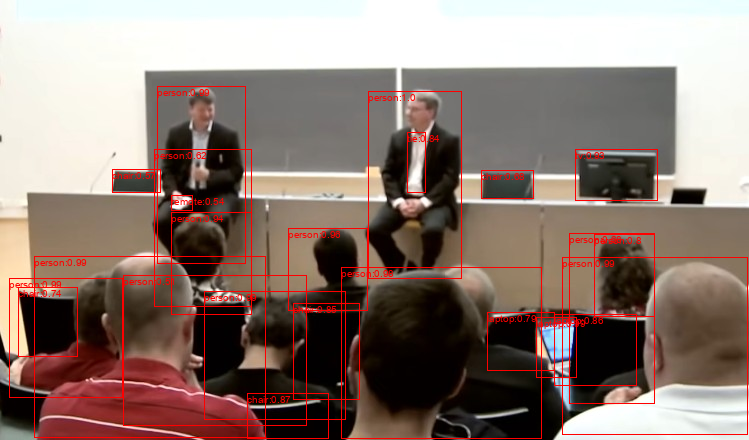

In [13]:
object_detect(model=model,
              image_path="./linus after saying.jpg",
              coco_names=COCO_INSTANCE_CATEGORY_NAMES
              )
